# Simple models for Prediction  – Mean sales

Let us start with making predictions using a few simple ways to start with. If I were to ask you, what could be the simplest way to predict the sales of an item, what would you say?

Even without any knowledge of machine learning, you can say that if you have to predict sales for an item – it would be the average over last few days . / months / weeks.

It is a good thought to start, but it also raises a question – how good is that model?

Turns out that there are various ways in which we can evaluate how good is our model. The most common way is Mean Squared Error. Let us understand how to measure it.

### Prediction Error

To evaluate how good is a model, let us understand the impact of wrong predictions. If we predict sales to be higher than what they might be, the store will spend a lot of money making unnecessary arrangement which would lead to excess inventory. On the other side if I predict it too low, I will lose out on sales opportunity.

So, the simplest way of calculating error will be, to calculate the difference in the predicted and actual values. However, if we simply add them, they might cancel out, so we square these errors before adding. We also divide them by the number of data points to calculate a mean error since it should not be dependent on number of data points.

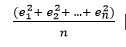

####     [each error squared and divided by number of data points]

##### This is known as the mean squared error

Here e1, e2 …. , en are the difference between the actual and the predicted values.

So, in our first model what would be the mean squared error? On predicting the mean for all the data points, we get a mean squared error = 29,11,799. Looks like huge error. May be its not so cool to simply predict the average value.

In [1]:
# STEP 1 : Import the necessary packages and libraries
import pandas as pd
from sklearn.metrics import mean_squared_error
import sys
from decimal import Decimal

In [2]:
# STEP 2: Read the data set
train_data = pd.read_csv('C:/Users/sunil/Learning/Comprehensive Learning path for NLP/002-Linear Regression/Case Study - Practice Problem - Big Mart Sales III/Data/train.csv')
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Compute Mean Sales for the field/column 
MeanItemOutletSales = train_data['Item_Outlet_Sales'].mean()
MeanItemOutletSales
MeanItemOutletSales_rounded = round(MeanItemOutletSales,2)
MeanItemOutletSales_rounded

2181.29

In [4]:
import numpy as np
train_data_pred = train_data
train_data_pred['Item_Outlet_Sales_pred'] = MeanItemOutletSales_rounded
train_data_pred.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Outlet_Sales_pred
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,2181.29
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2181.29
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,2181.29
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,2181.29
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,2181.29


In [5]:
def getdiffyandybar(x):
    #yminusybar = round((round(x.Item_Outlet_Sales,2) - x.Item_Outlet_Sales_pred) ** (round(x.Item_Outlet_Sales,2) - x.Item_Outlet_Sales_pred),2)
    yminusybar = Decimal((x.Item_Outlet_Sales - x.Item_Outlet_Sales_pred) ** 2)
    #print(x)
    return round(yminusybar,2)

In [6]:
train_data_pred_new = train_data_pred
train_data_pred_new['diffbetwyandmean'] = train_data_pred_new.apply(lambda x: getdiffyandybar(x),axis=1)


In [7]:
train_data_pred_new.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Outlet_Sales_pred,diffbetwyandmean
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,2181.29,2414443.61
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2181.29,3020182.40
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,2181.29,7059.36
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,2181.29,2099340.19
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,2181.29,1407983.49


In [8]:
train_data_pred_new['diffbetwyandmean'].sum() / train_data_pred_new.shape[0]

Decimal('2911799.258200164261410301537')